In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("LUBW/HD_2020.csv", encoding="ISO-8859-1")

In [4]:
df = pd.read_csv("LUBW/HD_2020.csv", usecols = ["Datum ", "Temperatur (°C)", "NO (µg/m³)", "NO2 (µg/m³)", "Ozon (µg/m³)","Globalstrahlung (W/m²)", "Windrichtung (°)", "Windgeschwindigkeit (m/s)"], encoding="ISO-8859-1", infer_datetime_format =True, dayfirst = True) 

In [10]:
df["NOx"]=df["NO (µg/m³)"]+df["NO2 (µg/m³)"]
df["NOx/NO2"]=df["NOx"]/df["NO2 (µg/m³)"]

In [11]:
df

,Datum,NO (µg/m³),NO2 (µg/m³),Ozon (µg/m³),Temperatur (°C),Globalstrahlung (W/m²),Windrichtung (°),Windgeschwindigkeit (m/s),NOx,NOx/NO2
0,"Wed, 01/01/2020 00:00",42.5,34.8,1.1,2.8,8.0,305.0,0.8,77.3,2.221264
1,"Wed, 01/01/2020 00:30",59.8,34.3,1.6,2.6,8.0,325.0,0.6,94.1,2.743440
2,"Wed, 01/01/2020 01:00",63.7,34.2,1.7,1.9,8.0,295.0,0.7,97.9,2.862573
3,"Wed, 01/01/2020 01:30",56.8,31.2,NaN,1.1,8.0,16.0,0.4,88.0,2.820513
4,"Wed, 01/01/2020 02:00",61.3,28.4,1.1,0.5,8.0,352.0,0.3,89.7,3.158451
...,...,...,...,...,...,...,...,...,...,...
17564,"Thu, 31/12/2020 22:00",1.1,19.5,28.3,2.9,8.0,153.0,1.2,20.6,1.056410
17565,"Thu, 31/12/2020 22:30",1.3,18.9,28.8,3.1,8.0,150.0,1.1,20.2,1.068783
17566,"Thu, 31/12/2020 23:00",2.4,22.1,24.5,3.1,8.0,159.0,0.9,24.5,1.108597
17567,"Thu, 31/12/2020 23:30",1.5,22.4,24.0,3.2,8.0,151.0,0.8,23.9,1.066964


<AxesSubplot:xlabel='NOx', ylabel='NO2 (µg/m³)'>

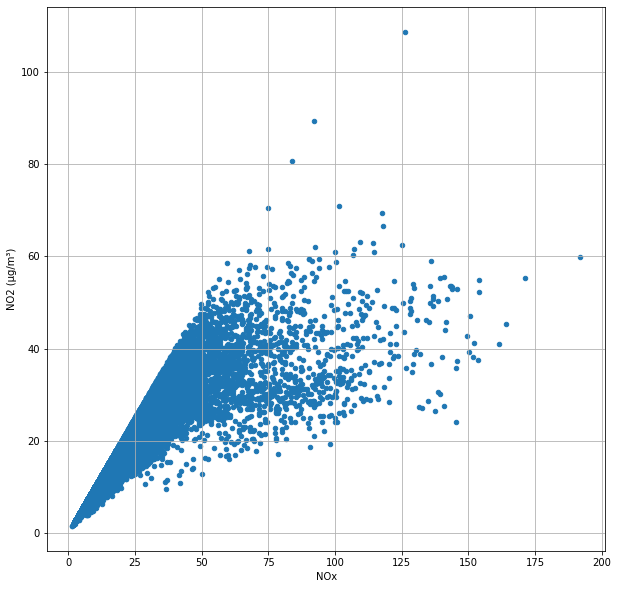

In [12]:
fig, ax = plt.subplots()
df.plot.scatter(grid=True, x ="NOx", y="NO2 (µg/m³)" ,figsize=(10,10), ax=ax) #, c="WDir", cmap= "inferno"

<AxesSubplot:xlabel='NO (µg/m³)', ylabel='NO2 (µg/m³)'>

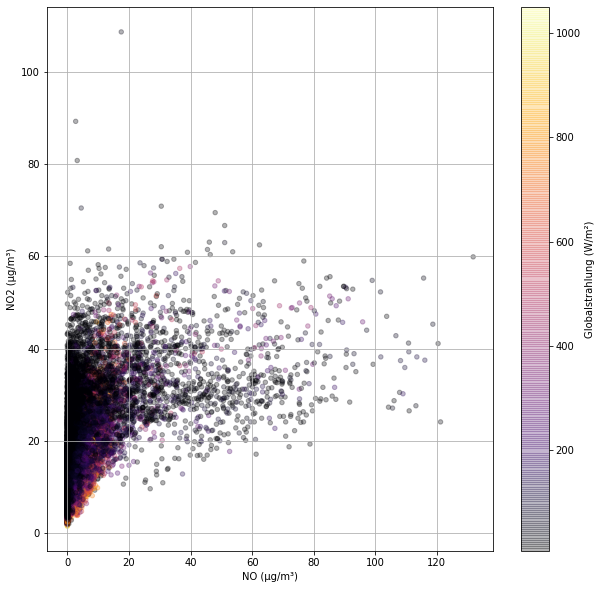

In [17]:
fig, ax = plt.subplots()
df.plot.scatter(grid=True, x ="NO (µg/m³)", y="NO2 (µg/m³)" , c="Globalstrahlung (W/m²)", cmap= "inferno",figsize=(10,10), ax=ax, alpha=0.3)

<AxesSubplot:xlabel='Ozon (µg/m³)', ylabel='NOx'>

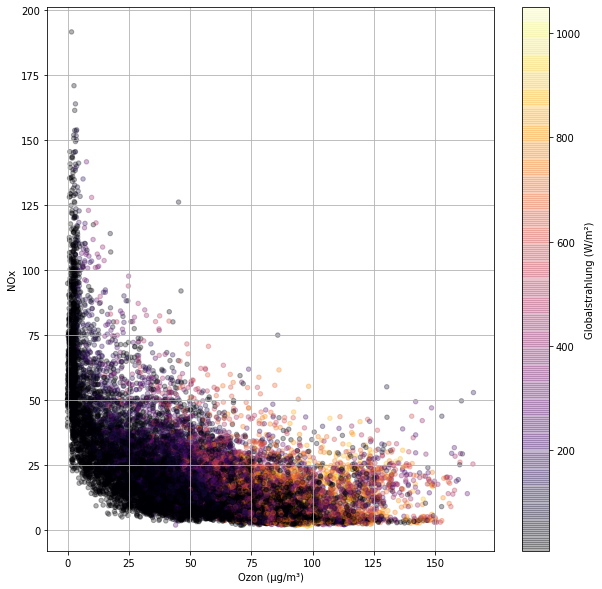

In [19]:
fig, ax = plt.subplots()
df.plot.scatter(grid=True, x ="Ozon (µg/m³)", y="NOx" , c="Globalstrahlung (W/m²)", cmap= "inferno",figsize=(10,10), ax=ax, alpha=0.3)

<AxesSubplot:xlabel='Windgeschwindigkeit (m/s)', ylabel='NO2 (µg/m³)'>

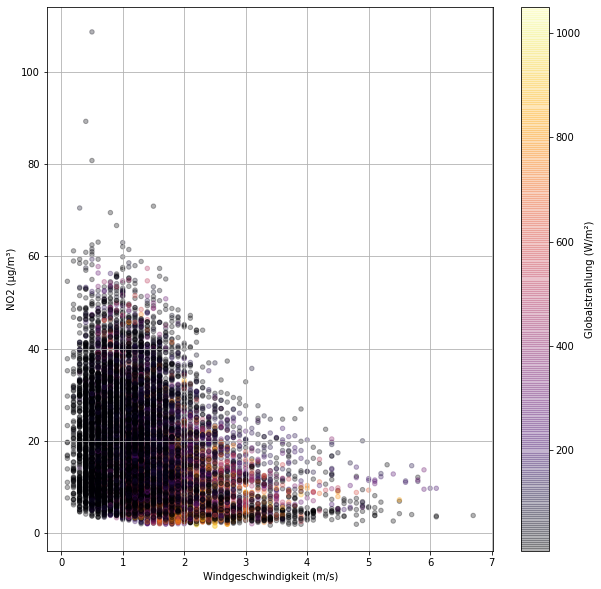

In [24]:
fig, ax = plt.subplots()
df.plot.scatter(grid=True, x ="Windgeschwindigkeit (m/s)", y="NO2 (µg/m³)" , c="Globalstrahlung (W/m²)", cmap= "inferno",figsize=(10,10), ax=ax, alpha=0.3)

<AxesSubplot:xlabel='Datum '>

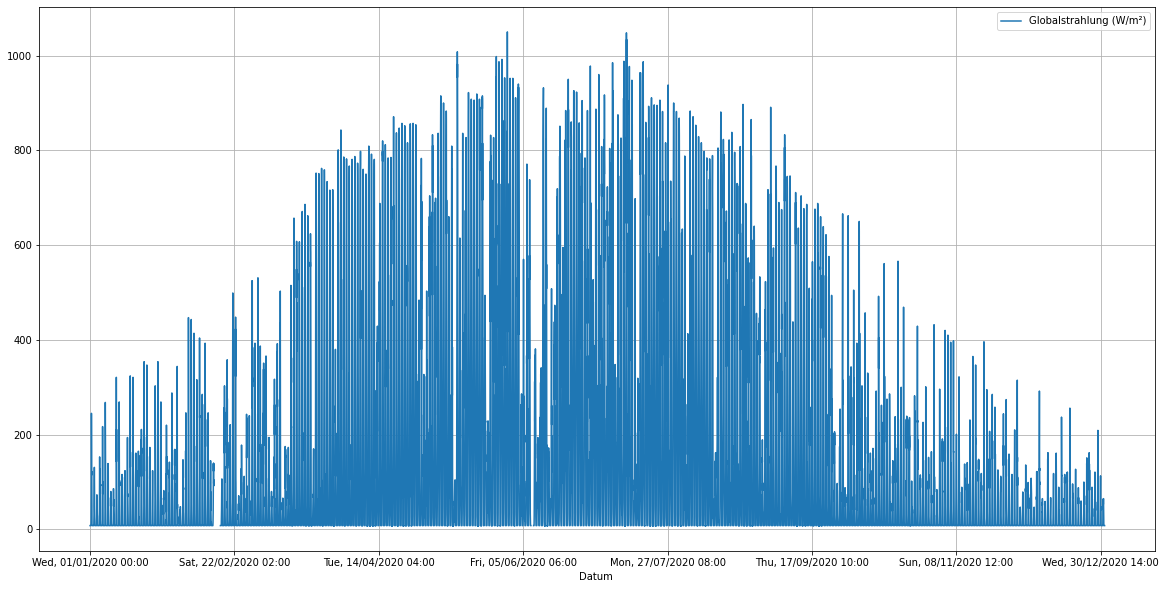

In [25]:
df.plot(x= "Datum ",grid = True, y=["Globalstrahlung (W/m²)"], figsize=(20,10))

In [ ]:
df.plot(x= "Datum ",grid = True, y=["NOx", ], figsize=(20,10))

In [32]:
my_date_range = pd.date_range('2020-1-1 00:00:00', periods = 17570, freq="30min", closed = "right")
df_sep = pd.DataFrame({'Time': my_date_range, 'NO2 (µg/m³)': df["NO2 (µg/m³)"], "Temperatur (°C)": df["Temperatur (°C)"], "Windgeschwindigkeit (m/s)": df["Windgeschwindigkeit (m/s)"], "NO (µg/m³)":df["NO (µg/m³)"], "Ozon (µg/m³)":df["Ozon (µg/m³)"],"Globalstrahlung (W/m²)":df["Globalstrahlung (W/m²)"]}) 
df_sep["hour"] = df_sep["Time"].dt.time
df_sep["uhrzeit"] = df_sep["Time"].dt.hour

In [44]:
mask= (df_sep['Time']>='2020-06-1 00:00:00') & (df_sep['Time'] <= '2020-06-02 23:30:00')
df_month=df_sep.loc[mask]

In [45]:
df_month

,Time,NO2 (µg/m³),Temperatur (°C),Windgeschwindigkeit (m/s),NO (µg/m³),Ozon (µg/m³),Globalstrahlung (W/m²),hour,uhrzeit
7295,2020-06-01 00:00:00,2.7,21.4,3.1,0.0,101.9,8.0,00:00:00,0
7296,2020-06-01 00:30:00,2.8,21.0,3.3,0.0,100.8,8.0,00:30:00,0
7297,2020-06-01 01:00:00,2.6,17.2,3.2,0.0,80.4,8.0,01:00:00,1
7298,2020-06-01 01:30:00,3.0,16.8,2.5,0.0,79.3,8.0,01:30:00,1
7299,2020-06-01 02:00:00,2.9,16.5,2.0,0.0,78.5,8.0,02:00:00,2
...,...,...,...,...,...,...,...,...,...
7386,2020-06-02 21:30:00,9.7,22.2,0.9,0.0,83.5,8.0,21:30:00,21
7387,2020-06-02 22:00:00,6.9,21.3,0.6,0.0,86.2,8.0,22:00:00,22
7388,2020-06-02 22:30:00,6.5,21.0,0.5,0.0,89.8,8.0,22:30:00,22
7389,2020-06-02 23:00:00,5.6,20.9,0.6,0.0,90.1,8.0,23:00:00,23


<AxesSubplot:xlabel='Time'>

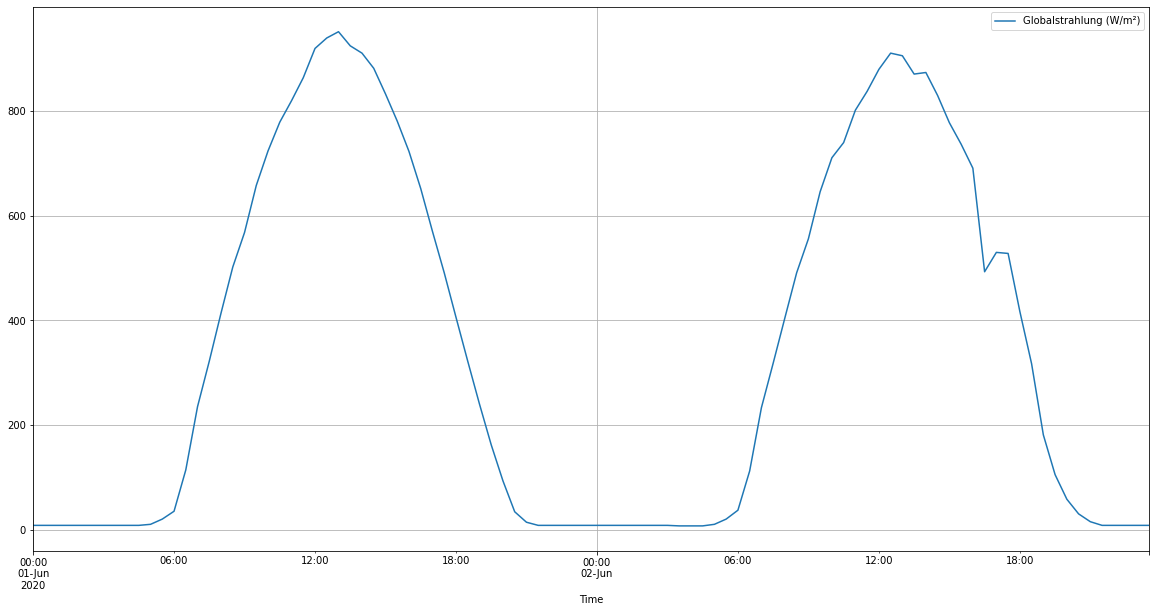

In [46]:
df_month.plot(x="Time", grid = True, y=["Globalstrahlung (W/m²)"], figsize=(20,10))

In [87]:
mask_day= (df["Globalstrahlung (W/m²)"]>=8.0)
df_day=df.loc[mask_day]
df_night=df.loc[~mask_day]

In [88]:
#df_night

<AxesSubplot:xlabel='Windgeschwindigkeit (m/s)', ylabel='NO2 (µg/m³)'>

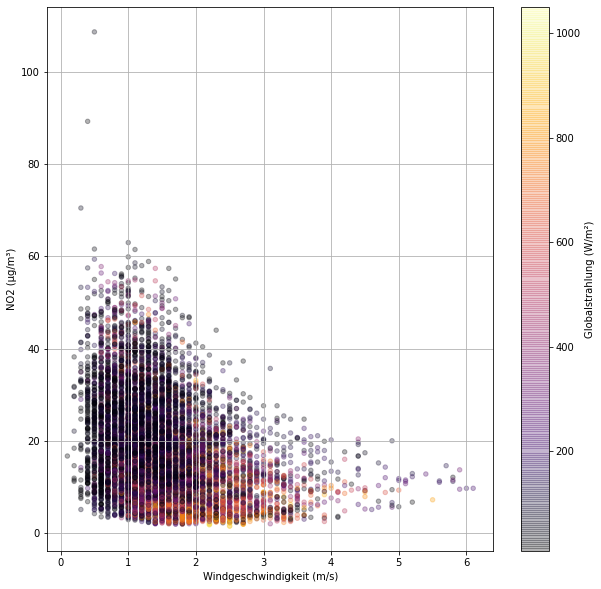

In [89]:

fig, ax = plt.subplots()
df_day.plot.scatter(grid=True, x ="Windgeschwindigkeit (m/s)", y="NO2 (µg/m³)" , c="Globalstrahlung (W/m²)", cmap= "inferno",figsize=(10,10), ax=ax, alpha=0.3)

<AxesSubplot:xlabel='Windgeschwindigkeit (m/s)', ylabel='NO2 (µg/m³)'>

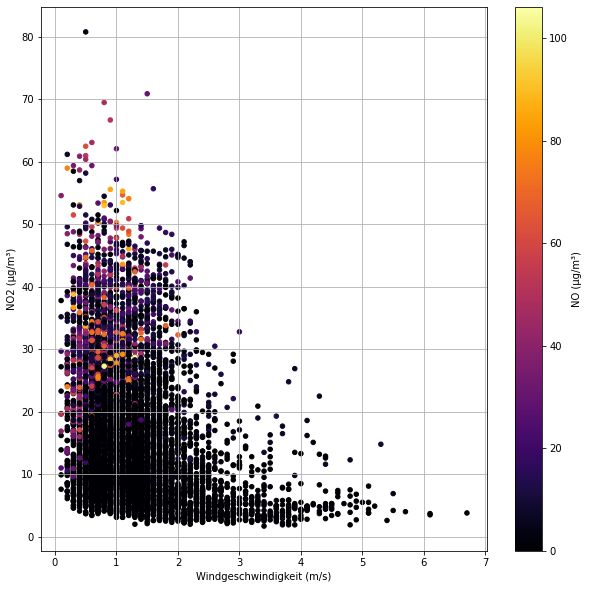

In [93]:

fig, ax = plt.subplots()
df_night.plot.scatter(grid=True, x ="Windgeschwindigkeit (m/s)", y="NO2 (µg/m³)" , c="NO (µg/m³)", cmap= "inferno",figsize=(10,10), ax=ax)#, alpha=0.3)

<AxesSubplot:xlabel='Datum '>

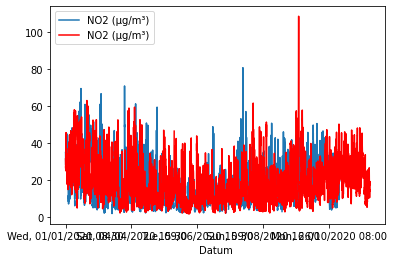

In [91]:
ax=df_night.plot(x="Datum ", y= ["NO2 (µg/m³)"])
df_day.plot(x="Datum ", y= ["NO2 (µg/m³)"], ax=ax, c="red")

In [94]:
mask_glob= (df["Globalstrahlung (W/m²)"]>=200.0)
df_glob=df.loc[mask_glob]
df_globlow=df.loc[~mask_glob]

<AxesSubplot:xlabel='Globalstrahlung (W/m²)', ylabel='NO2 (µg/m³)'>

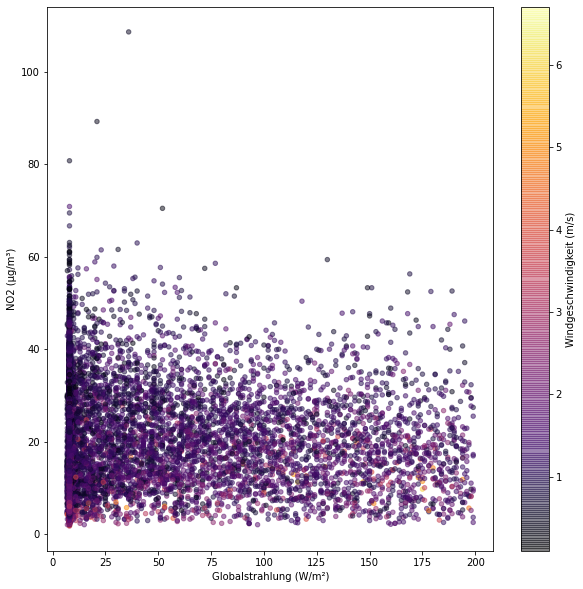

In [108]:
fig, ax = plt.subplots()
df_globlow.plot.scatter(y = "NO2 (µg/m³)", x="Globalstrahlung (W/m²)", c="Windgeschwindigkeit (m/s)", cmap= "inferno",figsize=(10,10), ax=ax, alpha=0.5)

<AxesSubplot:xlabel='Globalstrahlung (W/m²)', ylabel='NO2 (µg/m³)'>

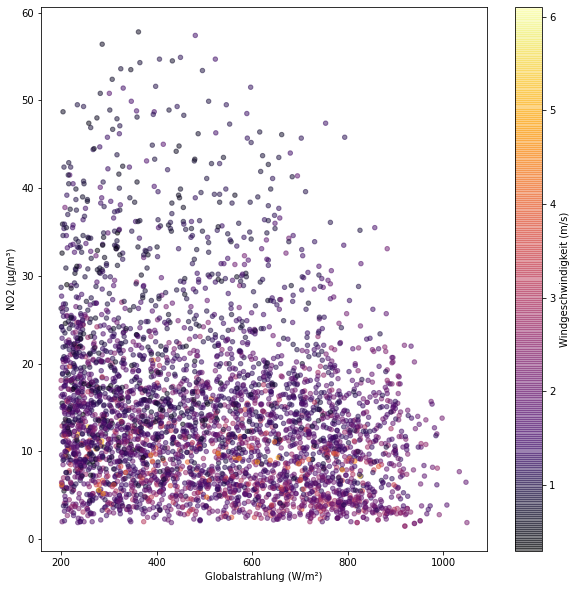

In [107]:
fig, ax = plt.subplots()
df_glob.plot.scatter(y = "NO2 (µg/m³)", x="Globalstrahlung (W/m²)", c="Windgeschwindigkeit (m/s)", cmap= "inferno",figsize=(10,10), ax=ax, alpha=0.5)

<AxesSubplot:xlabel='Globalstrahlung (W/m²)', ylabel='NO2 (µg/m³)'>

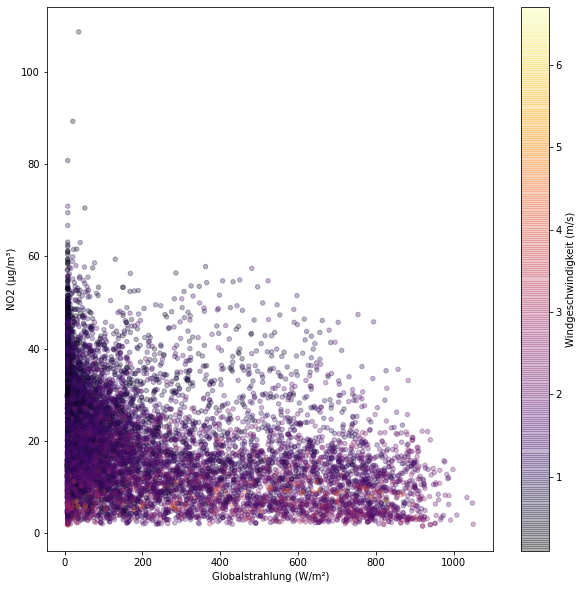

In [106]:
fig, ax = plt.subplots()
df.plot.scatter(y = "NO2 (µg/m³)", x="Globalstrahlung (W/m²)", c="Windgeschwindigkeit (m/s)", cmap= "inferno",figsize=(10,10), ax=ax, alpha=0.3)

In [109]:
mask_no2= (df["NO2 (µg/m³)"]>=20.0)
df_no2=df.loc[mask_no2]
df_no2low=df.loc[~mask_no2]

<AxesSubplot:xlabel='Globalstrahlung (W/m²)', ylabel='NO2 (µg/m³)'>

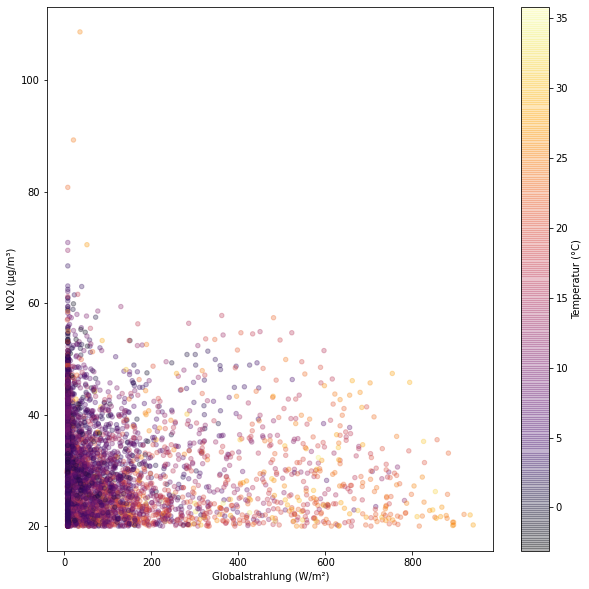

In [115]:
fig, ax = plt.subplots()
df_no2.plot.scatter(y = "NO2 (µg/m³)", x="Globalstrahlung (W/m²)", c="Temperatur (°C)", cmap= "inferno",figsize=(10,10), ax=ax, alpha=0.3)

<AxesSubplot:xlabel='Globalstrahlung (W/m²)', ylabel='NO2 (µg/m³)'>

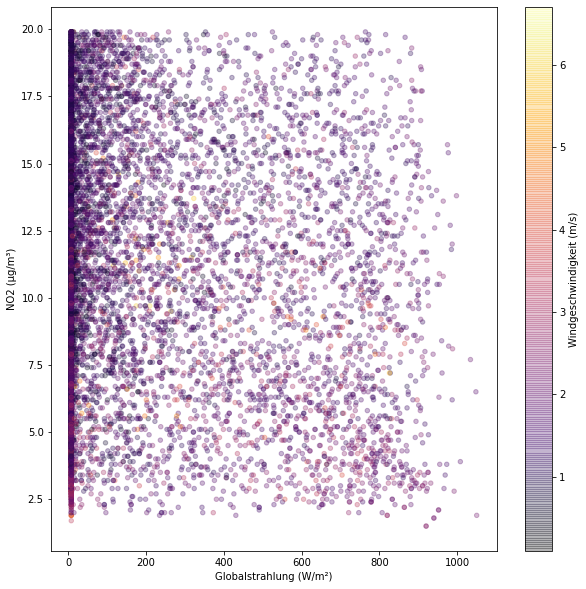

In [112]:
fig, ax = plt.subplots()
df_no2low.plot.scatter(y = "NO2 (µg/m³)", x="Globalstrahlung (W/m²)", c="Windgeschwindigkeit (m/s)", cmap= "inferno",figsize=(10,10), ax=ax, alpha=0.3)

<AxesSubplot:xlabel='Temperatur (°C)', ylabel='NO2 (µg/m³)'>

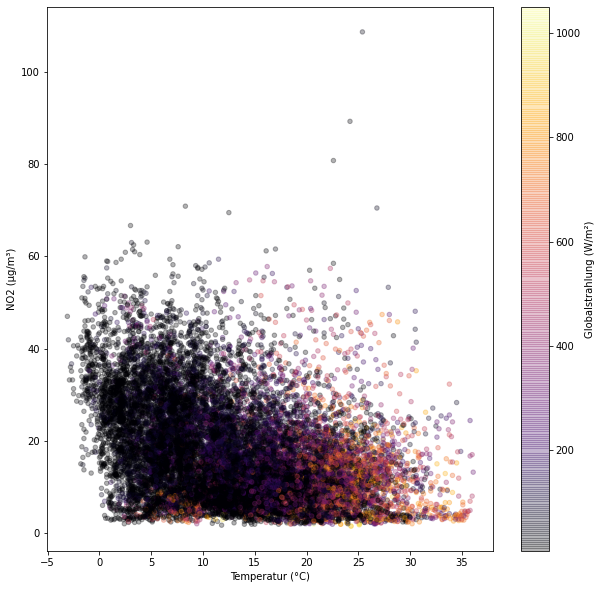

In [114]:
fig, ax = plt.subplots()
df.plot.scatter(y = "NO2 (µg/m³)", x="Temperatur (°C)", c="Globalstrahlung (W/m²)", cmap= "inferno",figsize=(10,10), ax=ax, alpha=0.3)